In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

# from chiral import CHIRAL
# from helper_fn import optimal_shift

from pyCHIRAL import CHIRAL, optimal_shift

In [2]:
path = "/Users/salati/Documents/CODE/github/scCircadianMeta/data/BULK/zhang.h5ad"
adata = sc.read_h5ad(path)

organ = "aorta"

/Users/salati/miniforge3/envs/numpyro/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
# log - transform the data
cc = np.median(adata.X.sum(axis=1))
eps = 1/cc
adata.layers["s_log"] = np.log(adata.X + eps)

adata2 = adata[adata.obs.organ == organ]

In [4]:
res = CHIRAL(adata2, layer="s_log", iterations=500)

/Users/salati/miniforge3/envs/numpyro/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  0%/Users/salati/Documents/CODE/github/pyCHIRAL/pyCHIRAL/em.py:228: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Q_hist = pd.concat([Q_hist, Q_temp])  # Append the new iteration results
  2%

Algorithm has converged


In [5]:
w =  2 * np.pi / 24
true_phase = (adata2.obs.ZT.values % 24) * w
phi = res["phi"]

phase_aligned, mad = optimal_shift(phi, true_phase)
mad

0.18730304377254714

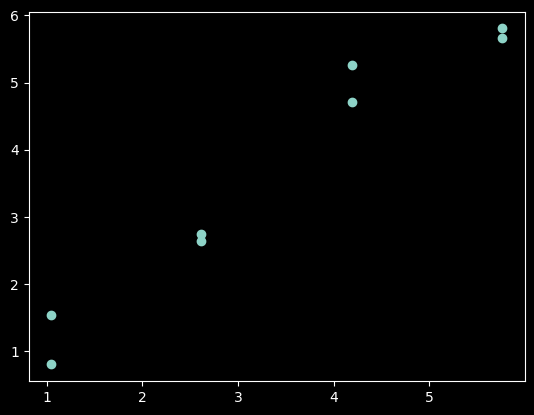

In [6]:
plt.scatter(true_phase, phase_aligned   )